### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Load the dataset

In [2]:
df = pd.read_csv(r'data/titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

### Train Test Split

In [6]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

### Traditional way of imputing missing values using Mean & Median

In [9]:
X_train.describe()

,Age,Fare,Family
count,572.000000,676.000000,712.000000
mean,29.498846,32.517788,0.932584
std,14.500059,52.545518,1.682525
min,0.420000,0.000000,0.000000
25%,21.000000,7.925000,0.000000
50%,28.000000,14.400000,0.000000
75%,38.000000,30.500000,1.000000
max,80.000000,512.329200,10.000000


#### Impute the Age and Fare columns

In [10]:
def mean_median_imputer(col):
    X_train[col + '_median'] = X_train[col].fillna(X_train[col].median())
    X_train[col + '_mean'] = X_train[col].fillna(X_train[col].mean())

In [11]:
mean_median_imputer('Age')
mean_median_imputer('Fare')

In [12]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
574,16.0,8.0500,0,16.0,16.000000,8.0500,8.0500
9,14.0,30.0708,1,14.0,14.000000,30.0708,30.0708
613,NaN,7.7500,0,28.0,29.498846,7.7500,7.7500
151,22.0,66.6000,1,22.0,22.000000,66.6000,66.6000
183,1.0,39.0000,3,1.0,1.000000,39.0000,39.0000


In [13]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225


In [14]:
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


* The Variance (spread of data) seems to be reduced after the imputing the missing values using mean and median.
* If the reduce in variance is drastic then it is a red flag.

#### Checking distribution after imputing

In [15]:
def visualize(col):
    plt.figure(figsize=(10, 6))

    # KDE for original column (with NaNs automatically dropped)
    sns.kdeplot(X_train[col], label=col + '_Original', color='blue')

    # KDE for median-imputed version
    sns.kdeplot(X_train[col + '_median'], label=col + '_Median', color='green')
 
    # KDE for mean-imputed version
    sns.kdeplot(X_train[col + '_mean'], label=col + '_Mean', color='red')

    plt.title(f'Distribution Comparison for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

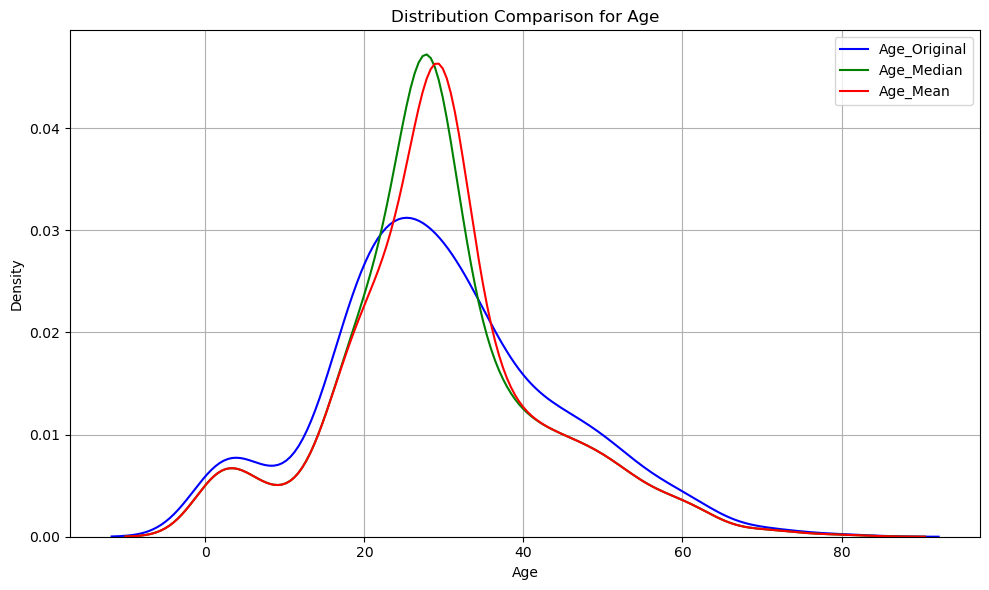

In [16]:
visualize('Age')

* Age ka distribution is changes => Most of the values are centered around mean and median. This is a red flag, there should not be a drastic change.

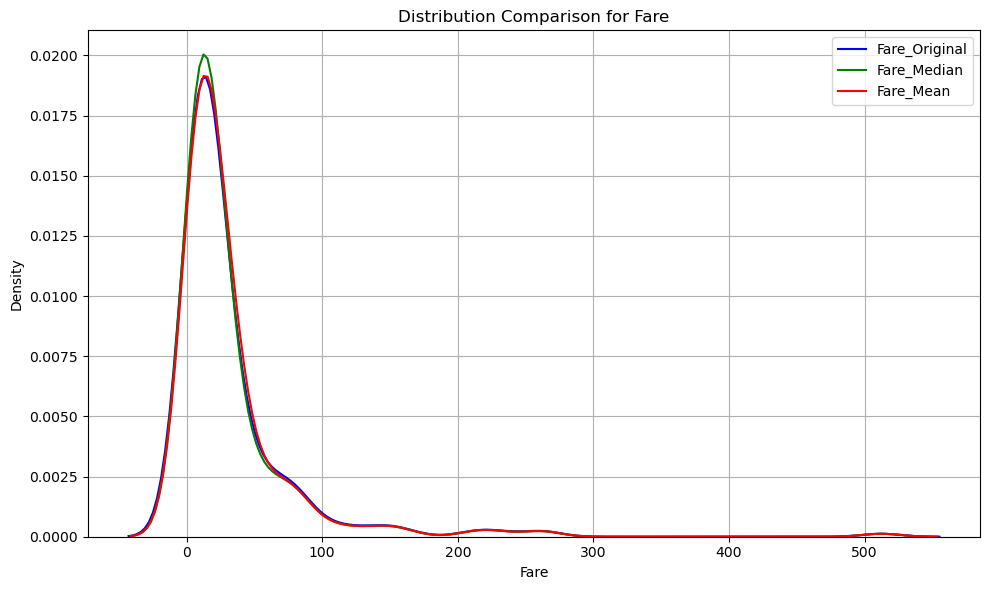

In [17]:
visualize('Fare')

* Fare ka distrribution is almost same. This is a green flag.

#### Check the Covariance and Correlation

In [18]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [19]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


* Changes in Covariance and Correlation are also not good.

#### Check for outliers (Box Plot)

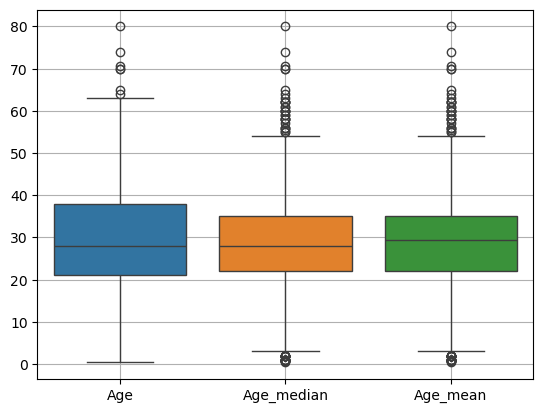

In [20]:
sns.boxplot(X_train[['Age', 'Age_median', 'Age_mean']]);
plt.grid(True);

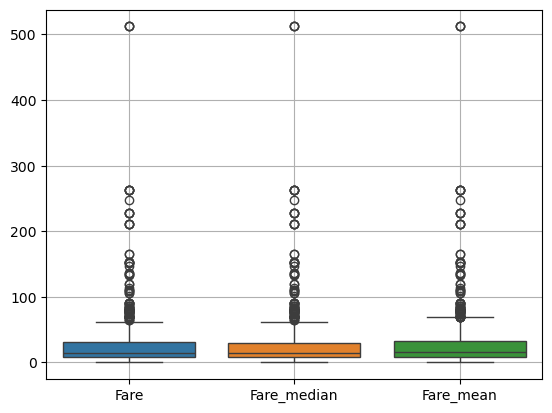

In [21]:
sns.boxplot(X_train[['Fare', 'Fare_median', 'Fare_mean']]);
plt.grid(True);

* By using mean and median for imputation, the IQR has shrunk, which implies, the values which were not outliers before are now outliers.

#### Conclusion

Mean and median imputation are both suitable for imputing missing values in the Fare variable, as they preserve the original distribution and have minimal impact on key statistical properties such as variance, covariance, and correlation with other features.

However, applying mean or median imputation to the Age variable is not recommended. Both methods noticeably alter the distribution of Age, introducing bias and reducing variance. This distortion also affects Age's covariance with other variables and weakens its correlation structure, potentially impacting the performance and interpretability of downstream models.

### Using Scikit-Learn

#### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

#### Simple Imputer

In [24]:
imputer_median = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='mean')

In [25]:
transformer = ColumnTransformer(
    transformers=[
        ('Imputer_median', imputer_median, ['Age']),
        ('Imputer_mean', imputer_mean, ['Fare'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=True,
    verbose=True
)

In [26]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

[ColumnTransformer]  (1 of 3) Processing Imputer_median, total=   0.0s
[ColumnTransformer] .. (2 of 3) Processing Imputer_mean, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


In [27]:
transformer.named_transformers_['Imputer_median'].statistics_

array([28.])

In [28]:
transformer.named_transformers_['Imputer_mean'].statistics_

array([32.51778772])

In [29]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])